## Assignment 2 - Build Your Toy Example

## Instructions
Use this template to create your toy example. Replace each section with your content:

1. **Project Overview**  
   Briefly describe your project.

2. **Input Data, Output Data, and Agent Code**  
   - Replace the input data section with your dataset.  
   - Update the output data section with your expected results.  
   - Add your core code (e.g., functions, algorithms).

3. **Final Output**  
   - Print the output of your model.


Submission:
   - Record a short walkthrough of your notebook as a video and share this colab link on **#week-2**.


Happy Building! 🚀


# 1. Project Overview

## 📔 Meal Idea Pod

### Project Overview
This project is a simple implementation of a meal suggestion from food list using a language model. The system takes an input text(ingredient list) and generates meal suggestiong on the text.

### 1. Input Data Used
The input data is the text to be used for the meal suggestion. The text is random ingredients.

### 2. Output Data
The output data is a dictionary containing list of suggested meals and expected cooking time.

### 3. Models Used
- OpenAI GPT-4o
- OpenAI GPT-4o-mini
- HuggingFace



# 2. Input Data, Output Data, and Agent Code

In [1]:
# Import Libraries
import random, openai, json, os

from dotenv import load_dotenv

In [2]:
load_dotenv()

# Set the OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")

## Image Input
User can upload food or receipt image and llm will give the json format as available ingredient.

In [ ]:
from IPython.display import Image
input = "Please give me the food in the picture in this format({tomato:3 pcs, garlic: 4pcs,...}). Please give me just the code."

Image(filename='sample-food.jpg')



In [7]:
# Tested with chat gpt-40
response= """
Unfortunately, I cannot identify the objects in the image directly.
If you provide a description of the food items visible in the picture,
I can format it for you in the requested structure.
"""

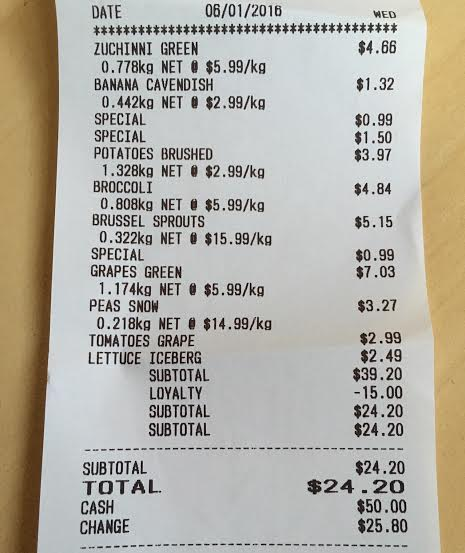

In [43]:
from IPython.display import Image
input = """1 Extract the text from the image?
2 Give me the data in format ({tomato: 1pc, lettuce: 1pc,...}).
Just respond with JSON."""

Image(filename='receipt_sample.jpeg')

In [4]:
response = {
  "zucchini_green": "0.778kg",
  "banana_cavendish": "0.442kg",
  "potatoes_bushed": "1.328kg",
  "broccoli": "0.808kg",
  "brussel_sprouts": "0.322kg",
  "grapes_green": "1.174kg",
  "peas_snow": "0.218kg",
  "tomatoes_grape": "1pc",
  "lettuce_iceberg": "1pc"
}


In [44]:
# Prepare base 64 encoding string
import base64
import imghdr

image_path ="receipt_sample.jpeg"

# Get the image type
def get_image_type(file_path):
    img_type = imghdr.what(file_path)
    if img_type:
        return f"image/{img_type}"  # MIME type format
    return None

img_type = get_image_type(image_path)
print(img_type) 


# Encode the image in Base64
with open(image_path, "rb") as image_file:
    img_b64_str = base64.b64encode(image_file.read()).decode("utf-8")
print(img_b64_str)

image/jpeg
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAgGBhISERISEhIVFRIVFRcVFRUXFxcVFRUVFRcXFxUXFRUVGCIdFRcgFxcVHSsdICUlKCgoFR0tMS0mMCInKCYBCQkJDQsNFw4OFyYdHR0mJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJv/AABEIAikB0QMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAABAAIEBQYDBwj/xABIEAACAQMCBAQEAgcFBQcFAQEBAgMABBESIQUGEzEiQVFhFDJxkSOBByRCUqGxwRUzYnKyc4KS0fAWJTRDY6LhNXSjs/HCg//EABkBAQEBAQEBAAAAAAAAAAAAAAABBAIDBf/EACURAQEBAAEEAgMBAQADAAAAAAABEQQDITEyAhIzQXEigSNRYf/aAAwDAQACEQMRAD8AumNQ5mru7bVAuH8q+E+k4TS1VoDjxd/T0+1TnPeojGrFQpvaobVNlqI9dxHXh0umWNv3XVvsQf6V7ZXhYbzr2+GTKqfVQfuM1u4v7ZOTPDuDRplGtjKNQeIcVjhKBg5ZwxUIpYnRgtsPY5/I1OzVDxs4uuHn/wBaRf8AigkP/wDmhEqbj0HRFz1B0T2b3J04x652x5UOLceS3KB45WDlVDIoZdTnCqTqG5rBX+OnJbblX4pMMKNR06NZAQdwGYbVY3HEDLwiCVt3jlgV/XXFOqHOf2vP86jrGpuOYQkixdCZ5Gi6uhAhYLq075cDOatoZMqpwVyAdJ7jI7HHmO1Zfi0cv9p2/RdVd7eZSWXWNKOjdgQc5I8/I1qlBxg7nG5xgE+Zx5VUsPDU4GudGjktdODUyiKDoGo665Zoig666PUriRSFFdw9QON8YW2gkmYFtOMKO7MxCoo+rECpQNZj9IGfgXbBISSGQ438KSoxP0GKEOn5yaNJxJb6bmJ4UEQky

In [45]:
client = openai.OpenAI()

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": input},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:{img_type};base64,{img_b64_str}"},
                },
            ],
        }
    ],
)

In [46]:
import re
text = response.to_dict()['choices'][0]['message']['content']
cleaned_text = re.sub(r'^```json\s*|\s*```$', '', text.strip())
ingredients_dict = json.loads(cleaned_text)
print(json.dumps(ingredients_dict, indent=2))

{
  "zucchini green": "1pc",
  "banana cavendish": "1pc",
  "potatoes brushed": "1.328kg",
  "broccoli": "0.808kg",
  "brussel sprouts": "0.322kg",
  "grapes green": "1.174kg",
  "peas snow": "0.218kg",
  "tomatoes grape": "1pc",
  "lettuce iceberg": "1pc"
}


## Meal Suggestions

In [40]:
# Get Input Data
## We Plan to get
input_data = """
Instruction:
Please give me some meal suggestion and expected cooking time(by minutes) according to the ingredients and preferences, put them
in this format(["curry", 60], ["meat bolognese":70],...]) and sort by cooking time. Return only a JSON array of the questions..

Ingredients:
{chicken:2 kg, rosemary:1 bunch, olive oil:500ml, lemons:3 pcs,
butter:250g, flour:1 kg, paprika:1 jar, parsley:1 bunch,
potatoes:10 pcs, eggs:6 pcs, parmesan:200g, black pepper:1 jar,
basil:1 bunch, mushrooms:200g, cream:250ml, salmon:2 fillets,
soy sauce:1 bottle, ginger:1 root, cinnamon:1 stick,
spinach:1 bunch, rice:2 kg, honey:1 jar, chili flakes:1 jar}

Preferences:
[Mexican,Japanese,Chinese]
"""


In [7]:
# Get Expected Output Data
output_data = [["chicken stir-fry", 30], ["teriyaki salmon", 35], ["lemon herb rice", 40],
["spinach and mushroom omelette", 45], ["honey garlic chicken", 50],
["chicken fried rice", 55], ["soy-glazed salmon with ginger rice", 60],
["potato paprika curry", 65], ["chicken ramen", 70],
["Mexican chicken stew", 80], ["Japanese chicken katsu", 90]]


In [ ]:
# Make the API call using GPT-4
client = openai.OpenAI()

response = client.chat.completions.create(
    messages=[{
        "role": "user",
        "content": input_data,
    }],
    model="gpt-4o-mini",
)

print(response)

In [ ]:
import ast

text = response.to_dict()['choices'][0]['message']['content']
cleaned_text = re.sub(r'^```json\s*|\s*```$', '', text.strip())
menu_items = json.loads(cleaned_text)

for menu, time in menu_items:
    print(f"{menu.capitalize()}, {time} mins" )

## Recipe Instruction

In [76]:
menu = "honey garlic chicken"
input_data = f"""
Instruction:
Please give me the recipe of {menu} according to the ingredients I have for 2 person. Return only markdown.

Ingredients:
{{chicken:2 kg, rosemary:1 bunch, olive oil:500ml, lemons:3 pcs,
butter:250g, flour:1 kg, paprika:1 jar, parsley:1 bunch,
potatoes:10 pcs, eggs:6 pcs, parmesan:200g, black pepper:1 jar,
basil:1 bunch, mushrooms:200g, cream:250ml, salmon:2 fillets,
soy sauce:1 bottle, ginger:1 root, cinnamon:1 stick,
spinach:1 bunch, rice:2 kg, honey:1 jar, chili flakes:1 jar}}
"""

In [67]:
# Get Expected Output Data
output_data = """
# Honey Garlic Chicken Recipe

## Ingredients:
- 1 kg chicken (from the 2kg provided)
- 2 tablespoons olive oil
- 4 cloves garlic (minced, from the 4 pcs available)
- 1/3 cup honey
- 3 tablespoons soy sauce
- 1 teaspoon chili flakes (optional)
- Salt and black pepper to taste
- Parsley (chopped for garnish)

## Instructions:

1. **Prepare the Chicken:**
   - Cut the chicken into bite-sized pieces or leave it whole based on your preference.
   - Season the chicken with salt and black pepper.

2. **Cook the Chicken:**
   - Heat olive oil in a large skillet over medium heat.
   - Add the chicken pieces and cook until golden brown and fully cooked (about 8-10 minutes). Remove from the skillet and set aside.

3. **Prepare the Honey Garlic Sauce:**
   - In the same skillet, reduce the heat to low and add the minced garlic. Sauté for 1-2 minutes until fragrant.
   - Add honey, soy sauce, and chili flakes (if using) to the skillet.
   - Stir the sauce and let it simmer for 3-4 minutes until it thickens slightly.

4. **Combine Chicken and Sauce:**
   - Return the cooked chicken to the skillet.
   - Toss the chicken in the honey garlic sauce until well-coated.

5. **Garnish and Serve:**
   - Garnish with chopped parsley.
   - Serve hot with steamed rice, roasted potatoes, or a side of spinach.

6. **Enjoy:**
   - Indulge in this sweet and savory honey garlic chicken!!

"""

In [ ]:
# Make the API call using GPT-4
client = openai.OpenAI()

response = client.chat.completions.create(
    messages=[{
        "role": "user",
        "content": input_data,
    }],
    model="gpt-4o-mini",
)

print(response)

In [ ]:
from IPython.display import Markdown

text = response.to_dict()['choices'][0]['message']['content']

display(Markdown(text))